<a href="https://www.kaggle.com/code/atifmasih/eda-of-fraud-detection-data-and-models-predictions?scriptVersionId=191040880" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-transactions-dataset/credit_card_transactions.csv


# Data Analysis and Pre-processing

1. What are the most common characteristics of fraudulent transactions compared to non-fraudulent ones?

* Analyzing the distribution of various features (e.g., transaction amount, merchant category) between fraud and non-fraud cases.

2. Are there any specific patterns in the time of transactions that are indicative of fraud?

* Investigating if certain times of the day, week, or month have higher instances of fraud.
3. How do demographic factors such as gender, age, and job affect the likelihood of fraud?

* Understanding the role of personal characteristics in fraudulent activity.

**Import libraries for dataset loading and exploration**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

**Import libraries for splitting the dataset**

In [3]:
from sklearn.model_selection import train_test_split

**Import libraries for Preprocessing of the dataset**

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


**Import libraries for Models Training**

In [5]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

****

**Import libraries for Models Prediction Scores**

In [6]:
from sklearn.metrics import accuracy_score,r2_score,precision_score,recall_score,roc_auc_score,classification_report

**Let's load and explore the dataset**

In [7]:
dataset = pd.read_csv("/kaggle/input/credit-card-transactions-dataset/credit_card_transactions.csv")
dataset.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [8]:
dataset.shape

(1296675, 24)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [10]:
dataset.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


**Let's explore missing values**

In [11]:
dataset.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

**Let's Handle Categorical Values using LabelEncoding method**

In [12]:
dataset.select_dtypes(include = 'object').columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [13]:
len(dataset.select_dtypes(include = 'object').columns)

12

In [14]:
label_encoders = {}
for column in ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le
dataset.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,162,18,0,568,...,-81.1781,3495,370,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,309,157,0,435,...,-118.2105,149,428,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,115,381,1,602,...,-112.2620,4154,307,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,163,463,1,930,...,-112.1138,1939,328,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,336,149,1,418,...,-79.4629,99,116,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [15]:
len(dataset.select_dtypes(include = 'object').columns)

3

**Lets Handle datetime features **

In [16]:
# Handle datetime features
dataset['trans_date_trans_time'] = pd.to_datetime(dataset['trans_date_trans_time'])
dataset['trans_year'] = dataset['trans_date_trans_time'].dt.year
dataset['trans_month'] = dataset['trans_date_trans_time'].dt.month
dataset['trans_day'] = dataset['trans_date_trans_time'].dt.day
dataset['trans_hour'] = dataset['trans_date_trans_time'].dt.hour
dataset['trans_minute'] = dataset['trans_date_trans_time'].dt.minute
dataset['trans_second'] = dataset['trans_date_trans_time'].dt.second

In [17]:
# Extract age from date of birth (dob)
dataset['dob'] = pd.to_datetime(dataset['dob'])
dataset['age'] = dataset['trans_date_trans_time'].dt.year - dataset['dob'].dt.year


In [18]:
len(dataset.select_dtypes(include = 'object').columns)

1

In [19]:
dataset.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,is_fraud,merch_zipcode,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,age
0,0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,162,18,0,568,...,-82.048315,0,28705.0,2019,1,1,0,0,18,31
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,309,157,0,435,...,-118.186462,0,NaN,2019,1,1,0,0,44,41
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,115,381,1,602,...,-112.154481,0,83236.0,2019,1,1,0,0,51,57
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,163,463,1,930,...,-112.561071,0,NaN,2019,1,1,0,1,16,52
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,336,149,1,418,...,-78.632459,0,22844.0,2019,1,1,0,3,6,33


**Let's drop irrelevant columns**

In [20]:
# Drop the specified columns without inplace=True
dataset = dataset.drop(columns=['Unnamed: 0','trans_date_trans_time', 'dob', 'trans_num'])


In [21]:
# Display the first 5 rows of the modified dataset
dataset.head(5)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_long,is_fraud,merch_zipcode,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,age
0,2703186189652095,514,8,4.97,162,18,0,568,526,27,...,-82.048315,0,28705.0,2019,1,1,0,0,18,31
1,630423337322,241,4,107.23,309,157,0,435,612,47,...,-118.186462,0,NaN,2019,1,1,0,0,44,41
2,38859492057661,390,0,220.11,115,381,1,602,468,13,...,-112.154481,0,83236.0,2019,1,1,0,0,51,57
3,3534093764340240,360,2,45.00,163,463,1,930,84,26,...,-112.561071,0,NaN,2019,1,1,0,1,16,52
4,375534208663984,297,9,41.96,336,149,1,418,216,45,...,-78.632459,0,22844.0,2019,1,1,0,3,6,33


**What are the most common characteristics of fraudulent transactions compared to non-fraudulent ones?**

**Hist plot to Compare the distribution of transaction amounts between fraud and non-fraud cases**

*The distribution of transaction amounts for fraudulent transactions might show peaks at certain amounts compared to non-fraudulent ones, indicating that frauds often occur at specific transaction amounts.*

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


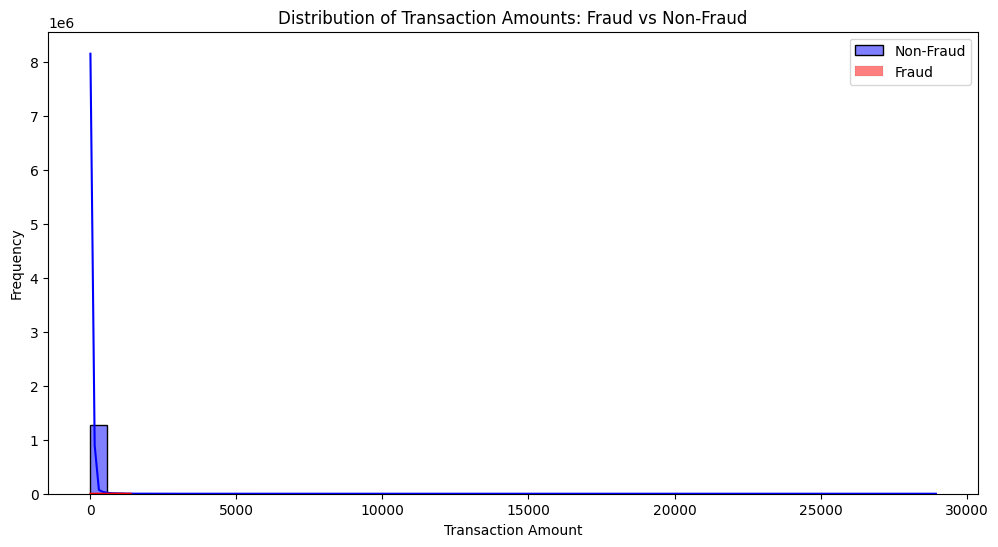

In [22]:
# Analysis: Compare the distribution of transaction amounts between fraud and non-fraud cases
plt.figure(figsize=(12, 6))
sns.histplot(dataset[dataset['is_fraud'] == 0]['amt'], bins=50, kde=True, color='blue', label='Non-Fraud')
sns.histplot(dataset[dataset['is_fraud'] == 1]['amt'], bins=50, kde=True, color='red', label='Fraud')
plt.legend()
plt.title('Distribution of Transaction Amounts: Fraud vs Non-Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


**violin plot to Compare the distribution of transaction amounts between fraud and non-fraud cases**

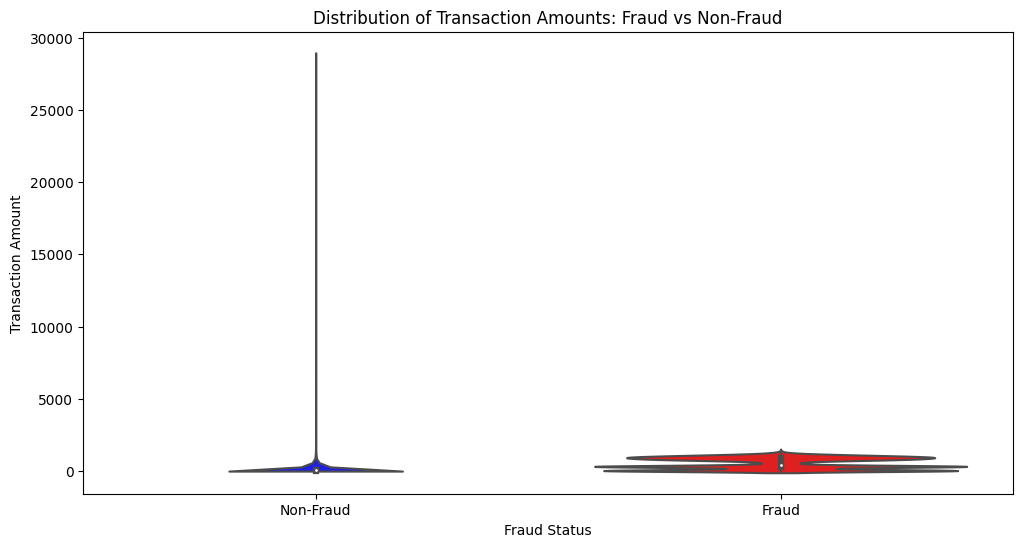

In [23]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='is_fraud', y='amt', data=dataset, palette={0: 'blue', 1: 'red'}, split=True)
plt.title('Distribution of Transaction Amounts: Fraud vs Non-Fraud')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()

**Are there any specific category which is active in fraudulent activities?**

In [24]:
dataset['category'].unique()

array([ 8,  4,  0,  2,  9,  3, 11, 12,  1, 10,  5, 13,  7,  6])

*Some merchant categories might have higher counts of fraudulent transactions like 2,4,6,7,12 showing in the plot*

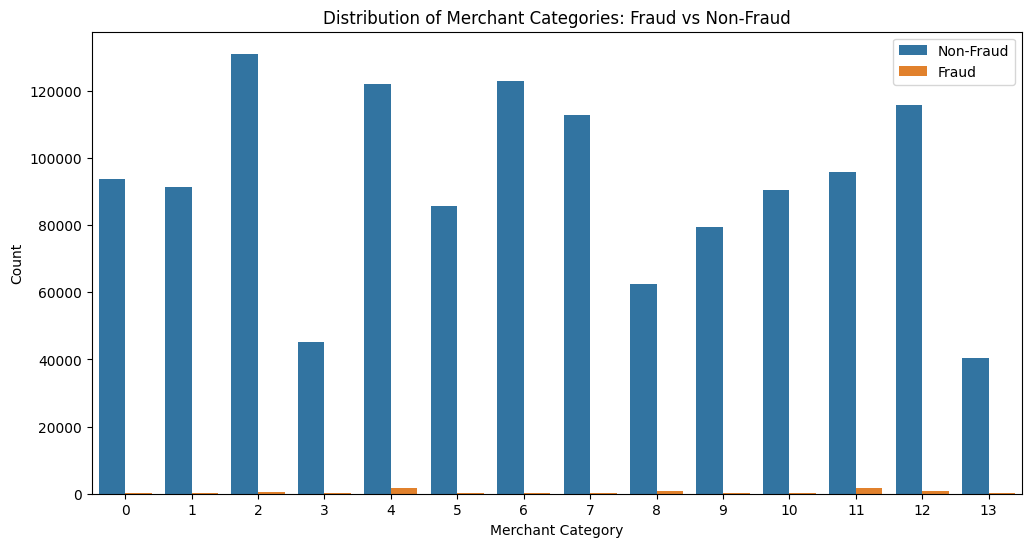

In [25]:
# Analysis: Compare the distribution of merchant categories between fraud and non-fraud cases
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=dataset)
plt.title('Distribution of Merchant Categories: Fraud vs Non-Fraud')
plt.xlabel('Merchant Category')
plt.ylabel('Count')
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()

**Are there any specific patterns in the time of transactions that are indicative of fraud?**

*Fraudulent transactions are more frequent above 15 hours, which could indicate patterns in fraudulent activity based on time showing in plot*

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


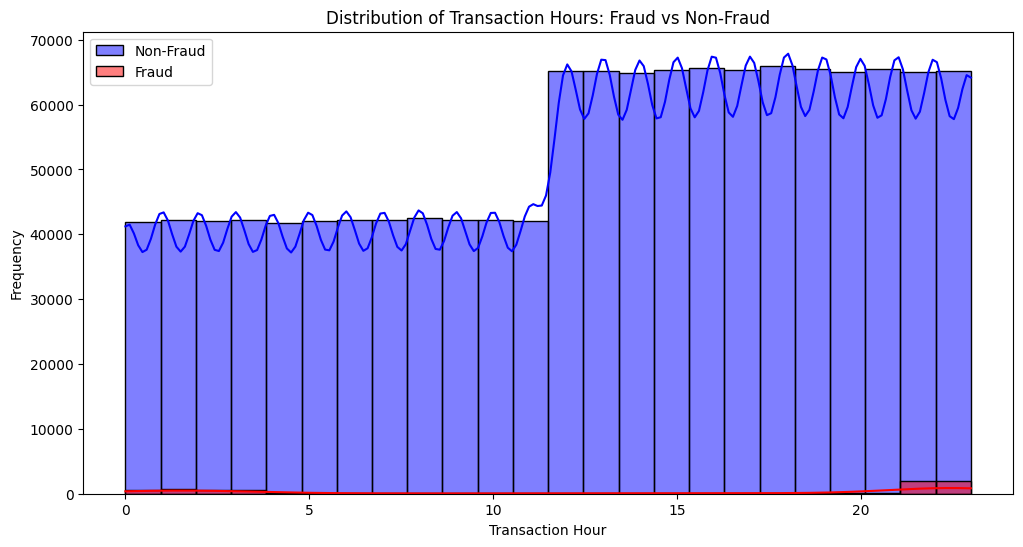

In [26]:
# Analysis: Compare the distribution of transaction time (hour) between fraud and non-fraud cases
plt.figure(figsize=(12, 6))
sns.histplot(dataset[dataset['is_fraud'] == 0]['trans_hour'], bins=24, kde=True, color='blue', label='Non-Fraud')
sns.histplot(dataset[dataset['is_fraud'] == 1]['trans_hour'], bins=24, kde=True, color='red', label='Fraud')
plt.legend()
plt.title('Distribution of Transaction Hours: Fraud vs Non-Fraud')
plt.xlabel('Transaction Hour')
plt.ylabel('Frequency')
plt.show()

**Visualization of gender vs fraud (0:F,1:M)**

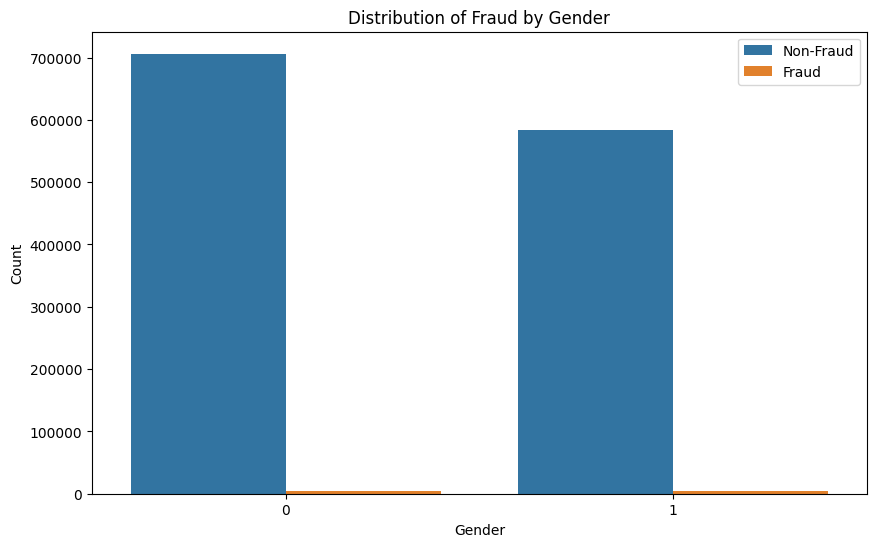

In [27]:
# Visualization of gender vs fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_fraud', data=dataset)
plt.title('Distribution of Fraud by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()

**Visualization of age vs fraud express that age 20 to 60 more fraudulent**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


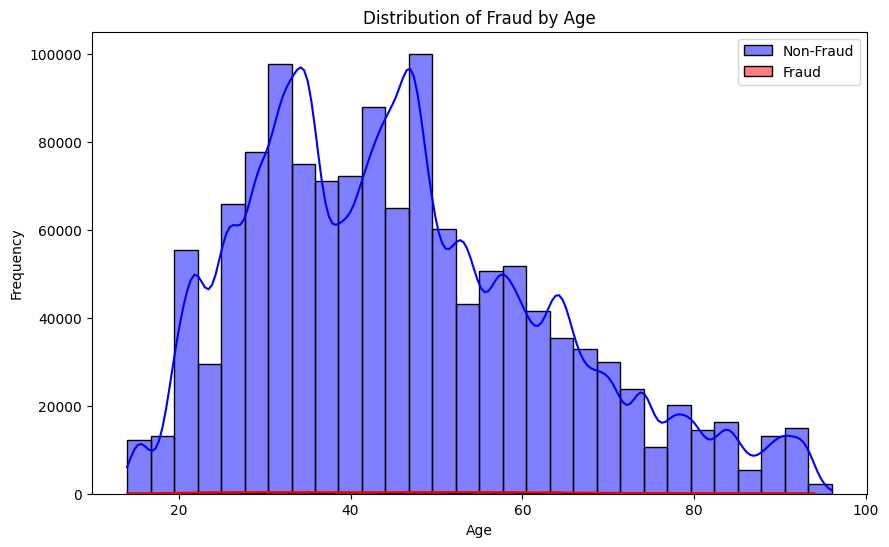

In [28]:
# Visualization of age vs fraud
plt.figure(figsize=(10, 6))
sns.histplot(dataset[dataset['is_fraud'] == 0]['age'], bins=30, kde=True, color='blue', label='Non-Fraud')
sns.histplot(dataset[dataset['is_fraud'] == 1]['age'], bins=30, kde=True, color='red', label='Fraud')
plt.legend()
plt.title('Distribution of Fraud by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Statistical Analysis**

*Chi-square Test for Gender vs. Fraud:is used to determine if there is a significant association between gender and fraud status.*

In [29]:
from scipy.stats import chi2_contingency

# Gender vs Fraud
gender_table = pd.crosstab(dataset['gender'], dataset['is_fraud'])
chi2, p, dof, expected = chi2_contingency(gender_table)
print(f"Chi-square test for gender vs fraud: chi2={chi2}, p-value={p}")

Chi-square test for gender vs fraud: chi2=75.51456622055794, p-value=3.627211385830374e-18


*chi2=75.51456622055794 value indicates that there is a substantial difference between the observed and expected frequencies in your data. Given the high Chi-square value, it suggests that the association between gender and fraud is quite strong.*
*The p-value (3.627211385830374e-18) is extremely small, much smaller than any common significance level (e.g., 0.05 or 0.01). This indicates that the result is statistically significant.*

*T-test for Age vs. Fraud:is used to compare the means of age between non-fraudulent and fraudulent cases.*

In [30]:
# For age, we'll use a t-test since it's a continuous variable
from scipy.stats import ttest_ind

non_fraud_ages = dataset[dataset['is_fraud'] == 0]['age']
fraud_ages = dataset[dataset['is_fraud'] == 1]['age']
t_stat, p_val = ttest_ind(non_fraud_ages, fraud_ages)
print(f"T-test for age vs fraud: t-statistic={t_stat}, p-value={p_val}")

T-test for age vs fraud: t-statistic=-14.182078536334389, p-value=1.1922562185026235e-45


*The negative t-statistic value indicates that the mean age in fraudulent cases is significantly lower than the mean age in non-fraudulent cases. The magnitude of the t-statistic indicates the strength of the difference.A very small p-value, such as the one you have (close to 0), suggests strong evidence against the null hypothesis of no difference. This indicates that the observed difference in mean ages is unlikely to have occurred by random chance.*

# Model Building and Evaluation

1. What machine learning algorithms perform best in detecting fraudulent transactions in this dataset?

* Comparing the performance of various algorithms like Logistic Regression, Random Forest, Gradient Boosting, and Neural Networks.


2. How do different evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC) compare in assessing the performance of fraud detection models?

* Identifying the most suitable metric for this specific fraud detection problem

**Let's create train and test set**

In [31]:
# Extract features and target variable
X = dataset.drop(columns=['is_fraud'])
y = dataset['is_fraud']

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Let's Normlized the Features**

In [32]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

predicted probabilities for the positive class (fraudulent transactions)

In [33]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=300)
}

In [34]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    if y_prob is not None:
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob)}\n")
    else:
        print("ROC-AUC Score: Not applicable (model does not support probability estimates)\n")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

ROC-AUC Score: 0.8382158820533288

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.80      0.83      0.81      1520

    accuracy                           1.00    259335
   macro avg       0.90      0.91      0.91    259335
weighted avg       1.00      1.00      1.00    259335

ROC-AUC Score: 0.9135163792989058

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.98      0.74      0.85      1

# The performance of different machine learning algorithms in detecting fraudulent transactions based on the classification report and ROC-AUC score. Here is an analysis of each model's performance:

**Logistic Regression**
* Precision for Fraud (1): 0.00
* Recall for Fraud (1): 0.00
* F1-Score for Fraud (1): 0.00
* ROC-AUC Score: 0.838


*Logistic Regression performs poorly in detecting fraud, as indicated by its precision, recall, and F1-score for the fraud class. Its ROC-AUC score is relatively low compared to other models.*

**Decision Tree**
* Precision for Fraud (1): 0.79
* Recall for Fraud (1): 0.83
* F1-Score for Fraud (1): 0.81
* ROC-AUC Score: 0.912

*The Decision Tree performs well, with good precision, recall, and F1-score for fraud. Its ROC-AUC score indicates better discrimination between fraudulent and non-fraudulent transactions than Logistic Regression.*

**Random Forest**
* Precision for Fraud (1): 0.98
* Recall for Fraud (1): 0.73
* F1-Score for Fraud (1): 0.84
* ROC-AUC Score: 0.989

*Random Forest performs very well with high precision for fraud and a good F1-score. Its ROC-AUC score is very high, indicating excellent performance.*

**Gradient Boosting**
* Precision for Fraud (1): 0.80
* Recall for Fraud (1): 0.63
* F1-Score for Fraud (1): 0.70
* ROC-AUC Score: 0.971

*Gradient Boosting performs well, but its recall for fraud is lower than the Decision Tree and Random Forest. Its ROC-AUC score is high, indicating good performance overall.*

**Neural Network**
* Precision for Fraud (1): 0.88
* Recall for Fraud (1): 0.71
* F1-Score for Fraud (1): 0.79
* ROC-AUC Score: 0.985

*The Neural Network performs very well, with good precision, recall, and F1-score for fraud. Its ROC-AUC score is also very high, similar to Random Forest.*

# Best Model

**Random Forest appears to be the best-performing model for detecting fraudulent transactions in this dataset, followed closely by the Neural Network. Both models have high precision, good recall, and excellent ROC-AUC scores, indicating they are effective at distinguishing between fraudulent and non-fraudulent transactions.**